# Introducing the Matched filter

In [1]:
# import standard libraries",
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns_context = "notebook"
sns.set_theme(context=sns_context, style="ticks")

In [9]:
# import functions from the `comms` package
# see prior notebooks for details
from comms.sources import string_source, string_sink
from comms.mod_mapping import BPSK, PAM4, mod_mapper
from comms.pulse_shaping import half_sine_pulse, sine_squared_pulse, pulse_shape

In [19]:
T = 1
fs = 128

fsT = int(fs*T)
tt = np.arange(fsT)/fs

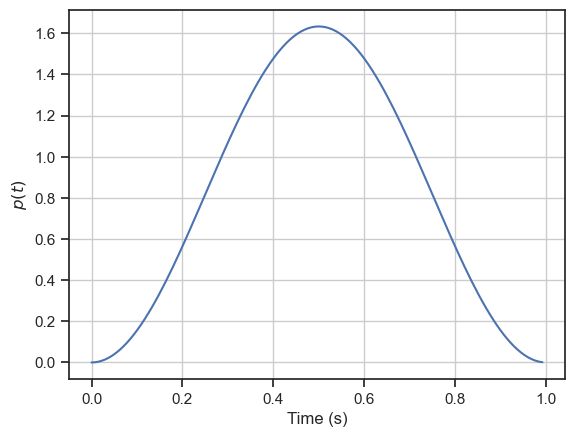

1.0

In [20]:
pp = sine_squared_pulse(fsT, fs)

plt.plot(tt, pp)
plt.grid()

plt.xlabel('Time (s)')
plt.ylabel('$p(t)$')

plt.show()
np.sum(pp**2) / fs

In [21]:
# make a signa
bits = string_source('Hi')
syms = mod_mapper(bits, PAM4)
sig = pulse_shape(syms, pp, fsT)

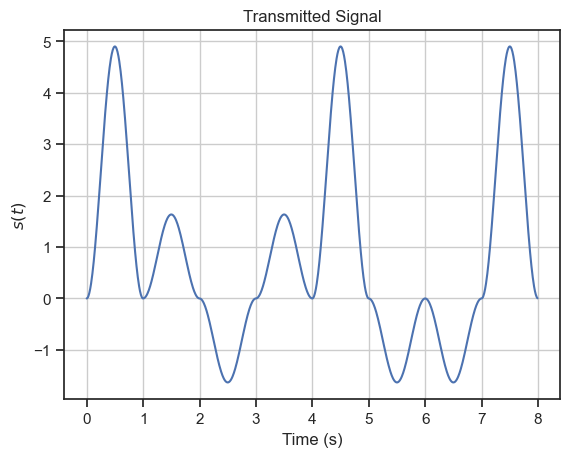

In [45]:
# transmitted signal
tt = np.arange(len(sig))/fs

plt.plot(tt, sig.real)
plt.grid()

plt.xlabel('Time (s)')
plt.ylabel('$s(t)$')

plt.title('Transmitted Signal')

plt.show()

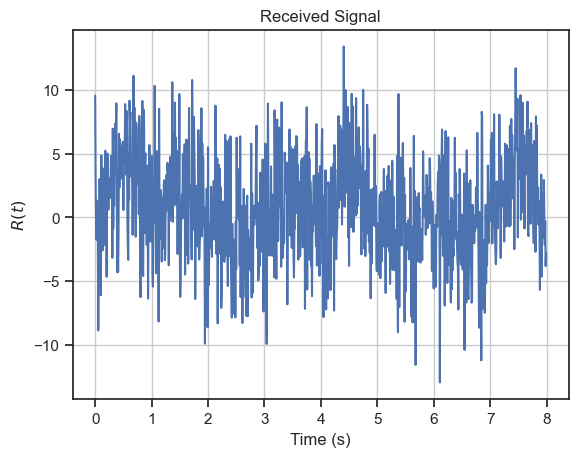

In [59]:
# simulate channel - additive noise
n_pwr = fsT/10  # 10dB SNR
r_sig = sig.real + np.sqrt(n_pwr) * np.random.randn(len(sig))

tt = np.arange(len(r_sig))/fs

plt.plot(tt, r_sig)
plt.grid()

plt.xlabel('Time (s)')
plt.ylabel('$R(t)$')

plt.title('Received Signal')

plt.show()

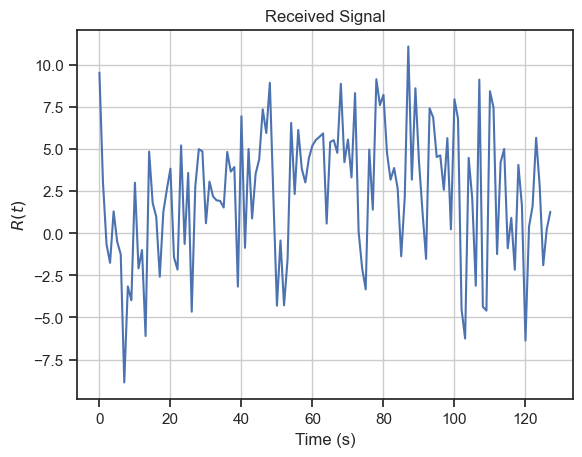

In [60]:
# extract just the first symbol
r0 = r_sig[:fsT]
tt = np.arange(len(r0))/fs

plt.plot(r0)
plt.grid()

plt.xlabel('Time (s)')
plt.ylabel('$R(t)$')

plt.title('Received Signal')

plt.show()


In [61]:
## what to do with r0 to recover syms[0]?
z = np.mean(r0 * pp)
z


2.733746133943879

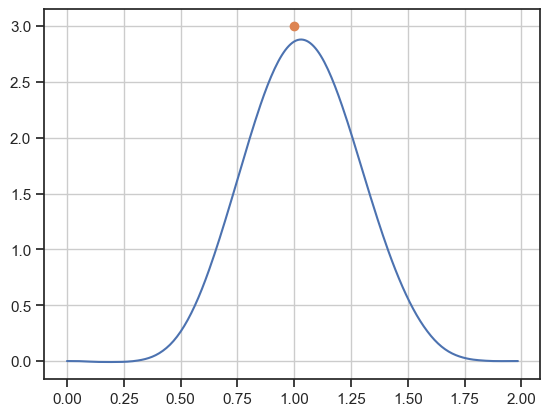

In [48]:
mf_out = np.convolve(r0, pp)/fs
tt = np.arange(len(mf_out))/fs

plt.plot(tt, mf_out)
plt.plot(1, np.real(syms[0]), 'o')
plt.grid()

/opt/local/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/local/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


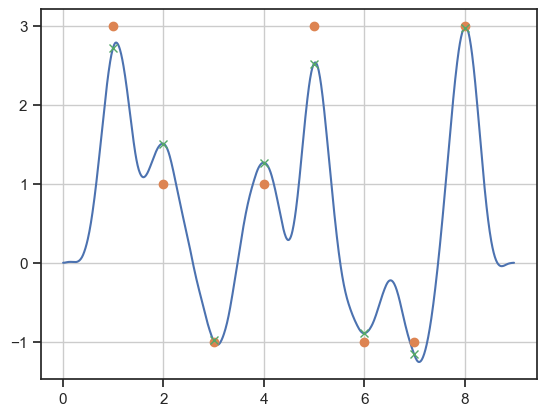

In [62]:
mf_out = np.convolve(r_sig, pp)/fs
tt = np.arange(len(mf_out))/fs

plt.plot(tt, mf_out)
plt.plot(np.arange(len(syms))+1, syms, 'o')
plt.plot(np.arange(len(syms))+1, mf_out[fsT-1::fsT], 'gx')
plt.grid()